# A Quick Look at Cancer Mortality: 1980-2014

**Reason for Visualization**: The rate at which cancer kills has changed as treatment improves along with changes in lifestyle. Observing these changes will bring to light some interesting geographical trends. This is also an opportunity to improve my ability to visualize data, especially geographical data for better understanding and presentation.

In [660]:
import pandas as pd
import numpy as np

from highcharts import Highmap

In [661]:
# Read in Mortality csv as dataframe
df = pd.read_csv("mort.csv", na_values=[' '])

**Further Analysis:** The Institute for Health Metrics and Evaluation provided this data. There are multiple categories provided (http://ghdx.healthdata.org/record/united-states-mortality-rates-county-1980-2014). I will be only looking into the "Neoplasm" or cancer related mortality rates from 1980-2014.

In [662]:
# Only observe Neoplasm(Cancer) related mortality
cancer = df.loc[df['Category'] == 'Neoplasms']

# Break up data based on FIPS into county specific and state specific datasets
counties = cancer[cancer['FIPS'] > 56][['FIPS','% Change in Mortality Rate, 1980-2014']]
states_raw = cancer[cancer['FIPS'] <= 56]
states = states_raw[states_raw['FIPS'] <= 56][['Location','% Change in Mortality Rate, 1980-2014']]


In [663]:
# Get minimum and step size to accurately display color information
def get_step(data, num_steps=6):
    maximum = data['% Change in Mortality Rate, 1980-2014'].max()
    minimum = data['% Change in Mortality Rate, 1980-2014'].min()

    variance = maximum - minimum

    step = variance/6
    
    return minimum, step
    

In [664]:
# County minimum and step size
C_minimum, C_step = get_step(counties)
# State minimum and step size
S_minimum, S_step = get_step(states)

In [665]:
# Convert the float FIPS value into a padded string value usable by highmap lib
def converter(x):
    return x['FIPS'].astype(int).astype(str).zfill(5)


In [666]:
# Counties/States - Trim down to usable list of dicts
counties.loc[:,'FIPS'] = counties.apply(converter, axis=1)

counties.columns = ['code', 'value']
counties_list = counties.T.to_dict().values()

states.columns = ['code', 'value']
states_list = states.T.to_dict().values()

In [667]:
# I left this highly verbose options formatting to see some basic changes to the maps that can be made
def create_options(minimum, step, title="rate", legend_text="rate"):
    options = {
        'chart': {
            'borderWidth': 1,
            'marginRight': 50 
        },

        'title': {
            'text': title
        },

        'legend': {
            'title': {
                'text': legend_text,
                'style': {
                    'color': "(Highcharts.theme && Highcharts.theme.textColor) || 'black'"
                }
            },
            'layout': 'vertical',
            'align': 'right',
            'floating': True,
            'valueDecimals': 0,
            'valueSuffix': '%',
            'backgroundColor': "(Highcharts.theme && Highcharts.theme.legendBackgroundColor) || 'rgba(255, 255, 255, 0.85)'",
            'symbolRadius': 0,
            'symbolHeight': 14
        },

        'mapNavigation': {
            'enabled': True
        },
        'colorAxis': {
            'dataClasses': [{
                'from': minimum,
                'to': (minimum+step),
                'color': '#ffffb2'
            }, {
                'from': (minimum+step),
                'to': (minimum+(2*step)),
                'color': '#fed976'
            }, {
                'from': (minimum+(2*step)),
                'to': (minimum+(3*step)),
                'color': '#feb24c'
            }, {
                'from': (minimum+(3*step)),
                'to': (minimum+(4*step)),
                'color': '#fd8d3c'
            }, {
                'from': (minimum+(4*step)),
                'to': (minimum+(5*step)),
                'color': '#f03b20'
            }, {
                'from': (minimum+(5*step)),
                'color': '#bd0026'
            }]
        },

        'plotOptions': {
            'map':{
            'mapData': 'geojson'

            },
            'mapline': {
                'showInLegend': False,
                'enableMouseTracking': False
            }
        },
    } 
    
    return options

In [668]:
# County - Plot county specific rates
S = Highmap(width = 800, height = 700)
states.head()
S_title = "Percentage Change in Cancer Deaths, 1980-2014"
S_legend = "Cancer Mortality<br>Rate"
S_options = create_options(S_minimum, S_step, S_title, S_legend)

S.set_dict_options(S_options)
S.add_data_set(states_list, 'map', '% Change', joinBy=['name', 'code'])
S.set_map_source('http://code.highcharts.com/mapdata/countries/us/us-all.js', jsonp_map=False)

S

In [669]:
# County - Plot county specific rates
C = Highmap(width = 800, height = 700)

C_title = "Percentage Change in Cancer Deaths, 1980-2014"
C_legend = "Cancer Mortality<br>Rate"
C_options = create_options(C_minimum, C_step, C_title, C_legend)

C.set_dict_options(C_options) # set options
C.add_data_set(counties_list, 'map', '% Change', joinBy=['fips', 'code'])

C.set_map_source('http://code.highcharts.com/mapdata/countries/us/us-all-all.js', jsonp_map=False)

C

**Graphing Yearly:** These maps are useful to visualize an overall trend geographically over the time period 1980-2014. It may give some insight to look into the yearly trends of the best and worst performing states for potential similarities.

In [670]:
# Drop excess columns and rename columns for ease of reference
states_yearly = states_raw.drop([
        'Mortality Rate, 1980* (Min)',
        'Mortality Rate, 1980* (Max)',
        'Mortality Rate, 1985* (Min)',
        'Mortality Rate, 1985* (Max)',
        'Mortality Rate, 1990* (Min)',
        'Mortality Rate, 1990* (Max)',
        'Mortality Rate, 1995* (Min)',
        'Mortality Rate, 1995* (Max)',
        'Mortality Rate, 2000* (Min)',
        'Mortality Rate, 2000* (Max)',
        'Mortality Rate, 2005* (Min)',
        'Mortality Rate, 2005* (Max)',
        'Mortality Rate, 2010* (Min)',
        'Mortality Rate, 2010* (Max)',
        'Mortality Rate, 2014* (Max)',
        'Mortality Rate, 2014* (Min)',
        '% Change in Mortality Rate, 1980-2014 (Min)',
        '% Change in Mortality Rate, 1980-2014 (Max)',
        'Category',
        'FIPS'
    ],axis=1)

states_yearly.columns = [
    'state',
    '1980',
    '1985',
    '1990',
    '1995',
    '2000',
    '2005',
    '2010',
    '2014',
    'change'
]

In [671]:
# Let's grab the states with the highest decrease in cancer mortality rates and 
# highest increase in cancer mortality rates
state_level_sorted = states_yearly.sort_values(['change'], ascending=[False])
state_level_sorted.reset_index()

low_improvement = state_level_sorted.head(5)['state'].tolist()
high_improvement =  state_level_sorted.tail(5)['state'].tolist()

In [672]:
print "Poorest Performing States:"
state_level_sorted.head(5)

Poorest Performing States:


,state,1980,1985,1990,1995,2000,2005,2010,2014,change
60533,West Virginia,243.44,247.06,249.82,255.49,248.36,240.19,230.21,234.41,-3.71
58503,Kentucky,251.19,254.42,255.55,261.07,253.68,245.01,234.91,239.55,-4.63
59660,Oklahoma,226.45,227.78,230.72,236.31,229.06,222.69,212.33,214.79,-5.15
58918,Mississippi,249.62,250.84,251.06,257.70,248.87,240.99,231.14,234.54,-6.04
58397,Kansas,211.25,213.43,213.83,219.08,210.97,203.65,193.84,196.48,-6.99


In [673]:
print "Best Performing States:"
state_level_sorted.tail(5)

Best Performing States:


,state,1980,1985,1990,1995,2000,2005,2010,2014,change
57683,California,231.47,226.35,216.08,212.05,195.47,182.78,168.84,165.36,-28.56
59297,New Jersey,264.12,258.40,249.67,244.10,224.70,206.75,191.21,187.60,-28.97
58706,Maryland,269.55,262.62,253.70,247.33,226.12,208.60,190.48,186.96,-30.64
59353,New York,256.79,246.36,240.09,233.42,210.93,194.51,179.55,177.13,-31.02
57820,District of Columbia,330.69,322.53,316.09,306.42,265.72,239.14,208.80,205.84,-37.75


In [674]:
# Drop the % change column so we can observe changes in yearly chunks
states_yearly_change = state_level_sorted.drop([
        'change'
    ],axis=1)

In [675]:
# Transform data for easy plotting
state_names = states_yearly_change['state'].tolist()
state_names.insert(0, 'year')

state_t = states_yearly_change.T.reset_index().drop(0)
state_t.columns = state_names

state_t.head()

,year,West Virginia,Kentucky,Oklahoma,Mississippi,Kansas,Tennessee,Alabama,Iowa,Utah,...,Virginia,Rhode Island,Massachusetts,Delaware,Connecticut,California,New Jersey,Maryland,New York,District of Columbia
1,1980,243.44,251.19,226.45,249.62,211.25,238.64,252.6,211.41,169.24,...,251.98,249.88,250.11,270.11,249.52,231.47,264.12,269.55,256.79,330.69
2,1985,247.06,254.42,227.78,250.84,213.43,239.67,252.43,212.47,168.73,...,247.29,245.38,245.15,264.95,241.76,226.35,258.4,262.62,246.36,322.53
3,1990,249.82,255.55,230.72,251.06,213.83,240.43,253.15,211.17,168.09,...,240.74,237.6,238.05,256.17,230.07,216.08,249.67,253.7,240.09,316.09
4,1995,255.49,261.07,236.31,257.7,219.08,244.89,257.15,214.5,171.66,...,239.73,234.43,238.46,250.85,227.76,212.05,244.1,247.33,233.42,306.42
5,2000,248.36,253.68,229.06,248.87,210.97,237.53,248.6,206.77,165.21,...,226.24,220.23,223.87,232.52,211.7,195.47,224.7,226.12,210.93,265.72


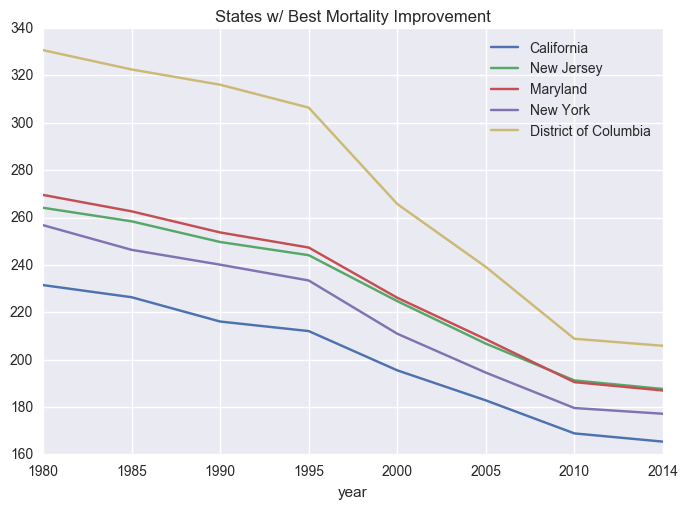

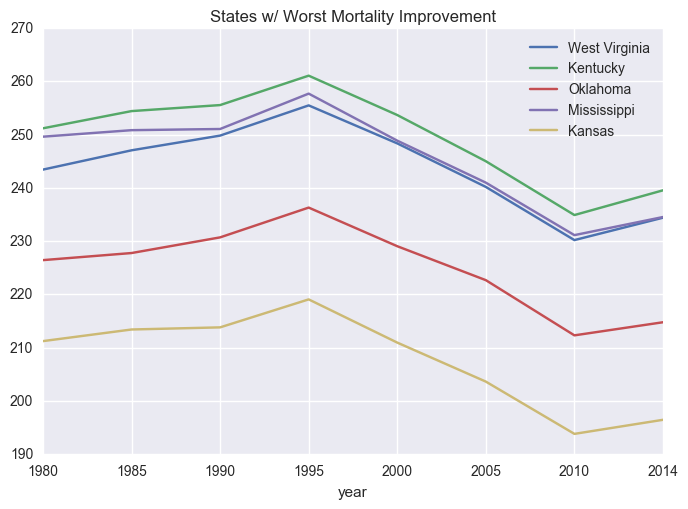

In [676]:
state_t.plot('year', high_improvement, title='States w/ Best Mortality Improvement')
state_t.plot('year', low_improvement, title='States w/ Worst Mortality Improvement')

**Observations:** Several interesting observations can be made about these graphs. Firstly, every state has a negative slope in cancer mortality rate since the 1980's. That's a good sign for improved treatment and health across the country. Secondly, the states with the highest decrease in cancer mortality reside primarily on the West and East Coast of the United States. The states with the lowest decrease in cancer mortality reside primarily in the South East of the United States. Finally there is an interesting trend in the data. The states with the highest decrease in cancer mortality have a very similar shape to one another and those with the lowest decrease have a similar shape to one another but both groups are dissimilar otherwise.

It would be worth looking into the health and treatment trends in 1995 - 2010 that lead to such a large decrease in mortality.

**Final Observations:** From 1980 - 2014, in most counties(boroughs/parishes) of the United States, a negative trend of cancer mortality can be observed. The largest decrease in cancer mortality can be seen in the Alaskan Borough of *Aleutians East/West* with a decrease of **57.49%**. The largest increase in cancer mortality can be seen in the Kentucky County of *Owsley* with an increase of **45.6%**. There appears to be a geographical correlation with an increase/decrease in cancer mortality over the past three and one half decades.

**Setup:** The color scheme steps were generated automatically by finding the variance between maximal change and minimal change and creating a series of six steps. Color Brewer: http://colorbrewer2.org/ was used to create the color scheme of the map.

**Credit:** I found that using this interactive map was quite useful for geographical data exploration. It is made possible by the javascript library: http://www.highcharts.com/ and the python implementation: https://github.com/kyper-data/python-highcharts. 